# Convolutional Neural Network
이번 실습에서는 MNIST data를 이용하여 CNN을 학습하고 MLP와 결과를 비교해보겠습니다.

또한, 학습된 model을 저장하는 방법을 알아보고,

Sequential API 외에 Functional API를 사용하여 model을 만드는 방법에 대해서 알아보겠습니다.

In [1]:
## Google Colab에서 TensorFlow 2.x 버전을 사용하기 위해서는 아래 magic command를 수행하면 간편하게 할 수 있습니다

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
## 필요한 Library들을 import 합니다
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## TensorFlow, Keras version 확인
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


In [0]:
np.random.seed(777)
tf.random.set_seed(777)

## Coding Tips

#### 1. Hyper Paramter 정하기
#### 2. Data 준비(불러오기 or download 등)
#### 3. Dataset 구성 (tf.data.Dataset 이용)
#### 4. Modlel 만들기 (Neural Network model)
#### 5. Loss function 정의, Optimizer 선택
#### 6. Training (Train, Test function 만들기 포함)
#### 7. Validation(or Test) 결과 확인

In [0]:
## Hyper-parameters
learning_rate = 0.001
N_EPOCHS = 20
N_BATCH = 100
N_CLASS = 10

In [0]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [6]:
## MNIST dataset load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]

In [0]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
# CNN에 입력으로 넣기 위해 3차원->4차원으로 변경(channel에 1을 추가)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]
# label을 onehot-encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [0]:
## dataset 구성    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(N_BATCH).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(N_BATCH)

## Sequential API

In [0]:
# Sequential API를 사용하여 model 구성
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [11]:
## Create model, compile & summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [12]:
## 학습 전에 결과 확인
model.evaluate(test_dataset)

100/100 [==============================] - 7s 73ms/step - loss: 2.3060 - accuracy: 0.1047


[2.305952389240265, 0.1047]

In [13]:
## Parameters for training
steps_per_epoch = N_TRAIN//N_BATCH
validation_steps = N_TEST//N_BATCH
print(steps_per_epoch, validation_steps)

600 100


In [14]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 5s 8ms/step - loss: 0.1915 - accuracy: 0.9392 - val_loss: 0.0411 - val_accuracy: 0.9870
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0280 - val_accuracy: 0.9909
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0278 - val_accuracy: 0.9911
Epoch 4/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0289 - accuracy: 0.9916 - val_loss: 0.0258 - val_accuracy: 0.9914
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0248 - val_accuracy: 0.9910
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0236 - val_accuracy: 0.9926
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0176 - accuracy: 0.9945 - va

In [0]:
## 결과 확인
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0],cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(N_CLASS), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(N_CLASS), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

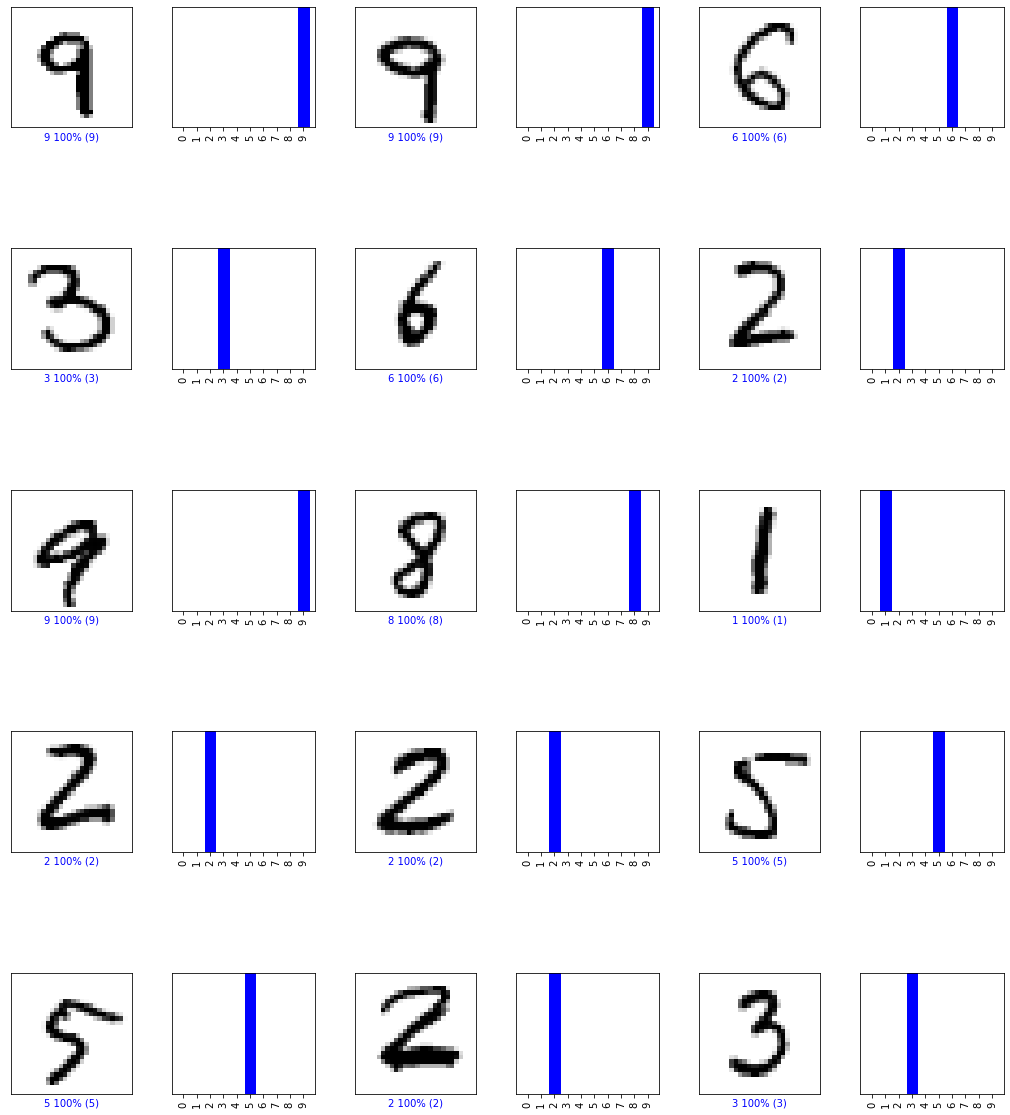

In [16]:
rnd_idx = np.random.randint(1, N_TEST//N_BATCH)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

## Weight 저장하고 불러오기

In [0]:
## Creating a checkpoint directory
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'mnist_cnn_keras'
ckpt_name = 'mnist_cnn_keras.ckpt'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_path = os.path.join(checkpoint_dir, ckpt_name)

In [0]:
## Saving weights
model.save_weights(checkpoint_path)

In [19]:
## 확인
!ls 'checkpoints/mnist_cnn_keras'

checkpoint
mnist_cnn_keras.ckpt.data-00000-of-00002
mnist_cnn_keras.ckpt.data-00001-of-00002
mnist_cnn_keras.ckpt.index


In [20]:
## Creating a new model
new_model1 = create_model()
new_model1.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
new_model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [21]:
## 학습 전에 결과 확인
new_model1.evaluate(test_dataset)

100/100 [==============================] - 0s 5ms/step - loss: 2.3036 - accuracy: 0.0551


[2.303635048866272, 0.0551]

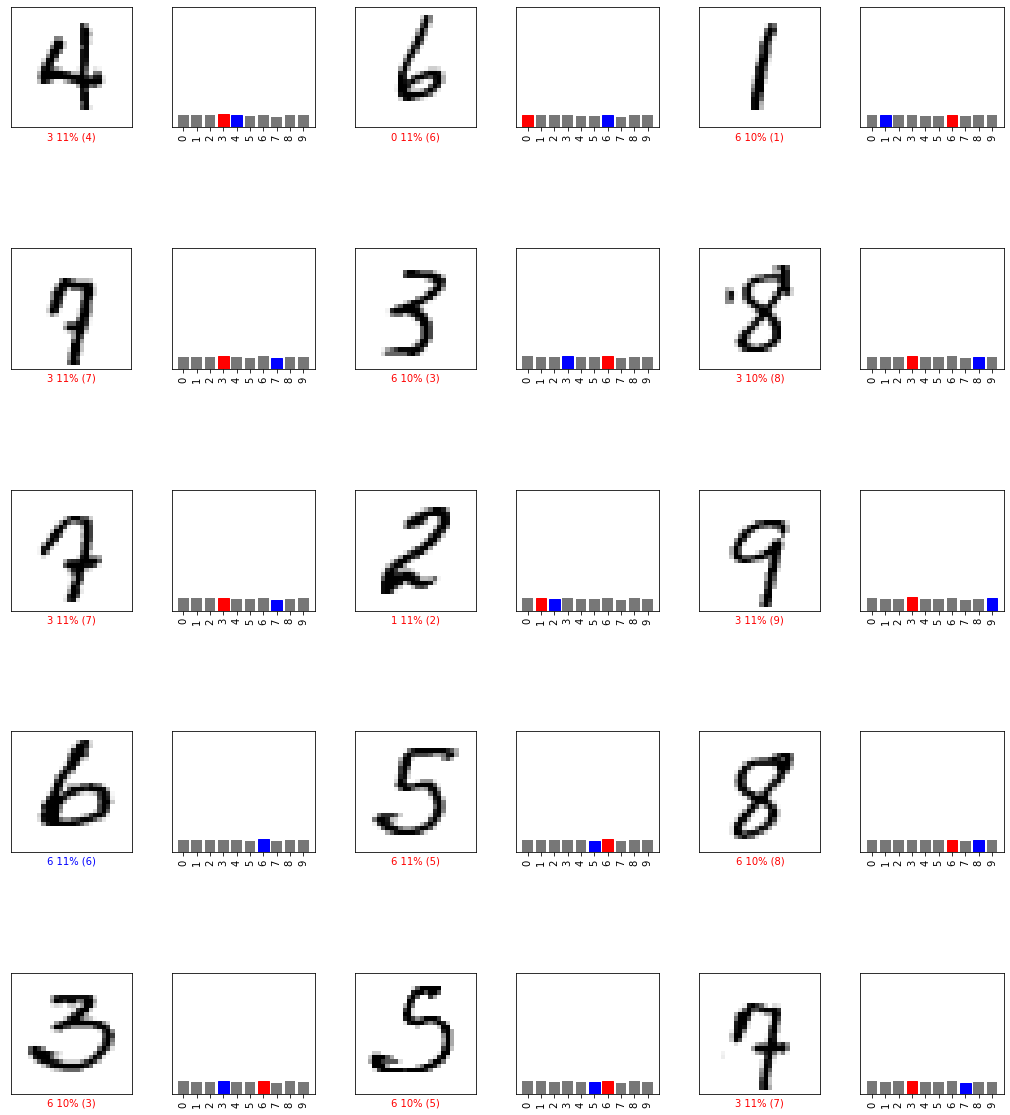

In [22]:
rnd_idx = np.random.randint(1, N_TEST//N_BATCH)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

In [23]:
## Restore weights
new_model1.load_weights(checkpoint_path)

In [24]:
## 결과 확인
new_model1.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9922


[0.03575061728614127, 0.9922]

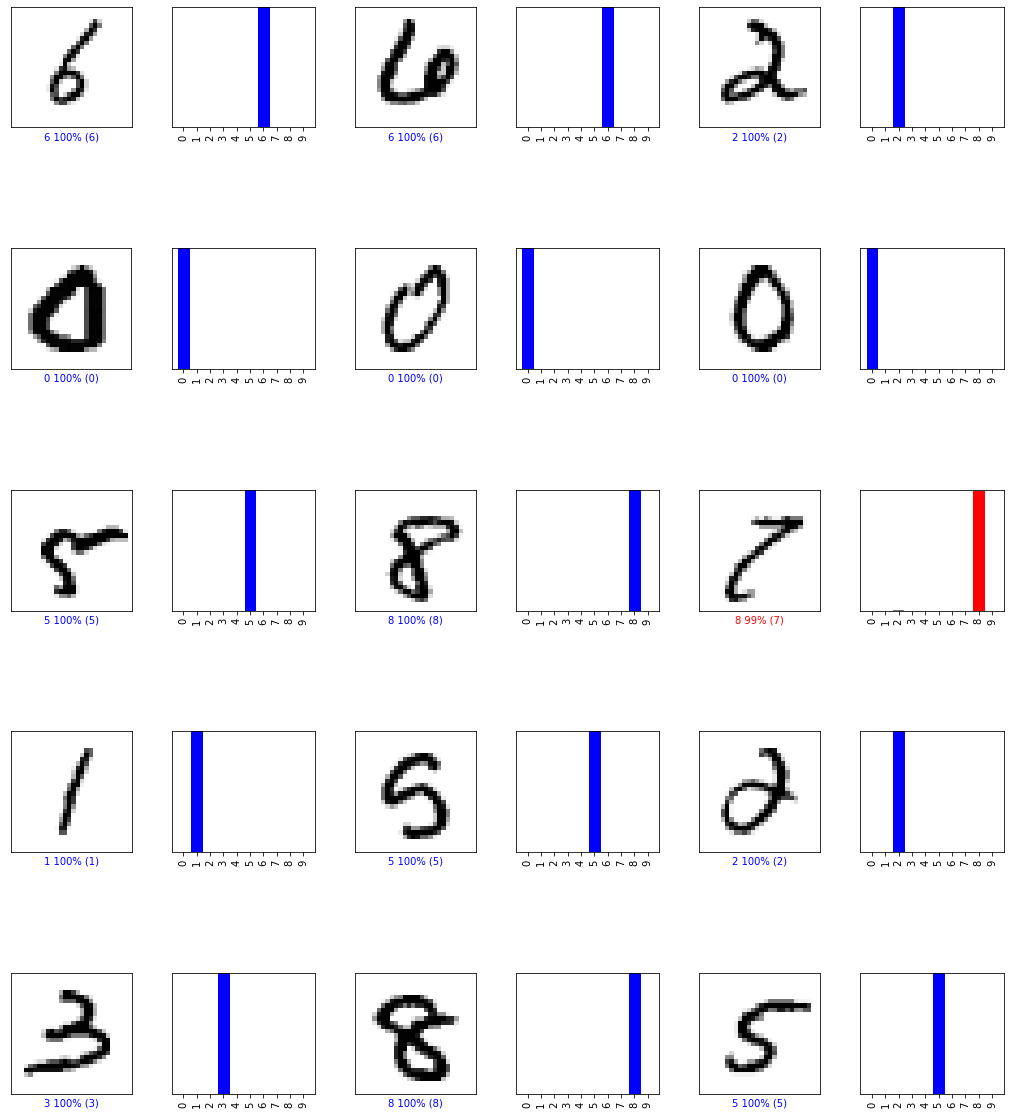

In [25]:
rnd_idx = np.random.randint(1, N_TEST//N_BATCH)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

## Callback 사용하여 저장하기

In [26]:
## 새로운 model 생성
model = create_model()

## model compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [27]:
## 학습 전에 결과 확인
model.evaluate(test_dataset)

100/100 [==============================] - 0s 5ms/step - loss: 2.3026 - accuracy: 0.1101


[2.302588708400726, 0.1101]

In [28]:
ckpt_name = 'mnist_cnn_{epoch:04d}.ckpt'
checkpoint_path = os.path.join(checkpoint_dir, ckpt_name)

# callback 만들기
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                              save_weights_only=True)

## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[cp_callback])

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2015 - accuracy: 0.9358 - val_loss: 0.0424 - val_accuracy: 0.9859
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0304 - val_accuracy: 0.9906
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0253 - val_accuracy: 0.9926
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0239 - val_accuracy: 0.9919
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0219 - val_accuracy: 0.9937
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0198 - val_accuracy: 0.9941
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0173 - accuracy: 0.9943 - va

In [29]:
## checkpoint 확인
!ls 'checkpoints/mnist_cnn_keras'

checkpoint
mnist_cnn_0001.ckpt.data-00000-of-00002
mnist_cnn_0001.ckpt.data-00001-of-00002
mnist_cnn_0001.ckpt.index
mnist_cnn_0002.ckpt.data-00000-of-00002
mnist_cnn_0002.ckpt.data-00001-of-00002
mnist_cnn_0002.ckpt.index
mnist_cnn_0003.ckpt.data-00000-of-00002
mnist_cnn_0003.ckpt.data-00001-of-00002
mnist_cnn_0003.ckpt.index
mnist_cnn_0004.ckpt.data-00000-of-00002
mnist_cnn_0004.ckpt.data-00001-of-00002
mnist_cnn_0004.ckpt.index
mnist_cnn_0005.ckpt.data-00000-of-00002
mnist_cnn_0005.ckpt.data-00001-of-00002
mnist_cnn_0005.ckpt.index
mnist_cnn_0006.ckpt.data-00000-of-00002
mnist_cnn_0006.ckpt.data-00001-of-00002
mnist_cnn_0006.ckpt.index
mnist_cnn_0007.ckpt.data-00000-of-00002
mnist_cnn_0007.ckpt.data-00001-of-00002
mnist_cnn_0007.ckpt.index
mnist_cnn_0008.ckpt.data-00000-of-00002
mnist_cnn_0008.ckpt.data-00001-of-00002
mnist_cnn_0008.ckpt.index
mnist_cnn_0009.ckpt.data-00000-of-00002
mnist_cnn_0009.ckpt.data-00001-of-00002
mnist_cnn_0009.ckpt.index
mnist_cnn_0010.ckpt.data-00000-of-0

In [30]:
## 마지막으로 저장된 checkpoint 불러오기
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'/content/checkpoints/mnist_cnn_keras/mnist_cnn_0020.ckpt'

In [31]:
# Create a new model instance
new_model2 = create_model()
new_model2.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
# Before loading weights
new_model2.evaluate(test_dataset)

# Load the previously saved weights
new_model2.load_weights(latest)

# Re-evaluate the model
new_model2.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.9939


[0.025861205812020754, 0.9939]

## 전체 model 저장하고 불러오기

In [32]:
## HDF5 format으로 전체 model 저장하기
save_dir_name = 'saved_models'
os.makedirs(save_dir_name, exist_ok=True)
hdf5_model_path = os.path.join(cur_dir, save_dir_name, 'my_model.h5')
hdf5_model_path

'/content/saved_models/my_model.h5'

In [0]:
## 저장
model.save(hdf5_model_path)

In [34]:
## 확인
!ls saved_models

my_model.h5


In [35]:
## 불러오기
new_model3 = keras.models.load_model(hdf5_model_path)

new_model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [36]:
## 결과 확인
new_model3.evaluate(test_dataset)

100/100 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9939


[0.025861205812020754, 0.9939]

In [42]:
## saved_model format으로 전체 model 저장하기
saved_model_path = os.path.join(cur_dir, save_dir_name, 'my_model')

model.save(saved_model_path)

INFO:tensorflow:Assets written to: /content/saved_models/my_model/assets


In [43]:
## 확인
!ls 'saved_models/my_model'

assets	saved_model.pb	variables


In [0]:
## 불러오기
new_model4 = keras.models.load_model(model_path)

In [45]:
## 결과 확인
new_model4.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9939


[0.025236018415991168, 0.9939]

## Functional API

In [0]:
# Functional API를 사용하여 model 구성
def create_model():
    inputs = keras.Input(shape=(28, 28, 1))
    conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation='relu')(inputs)
    pool1 = keras.layers.MaxPool2D(padding='SAME')(conv1)
    conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation='relu')(pool1)
    pool2 = keras.layers.MaxPool2D(padding='SAME')(conv2)
    conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation='relu')(pool2)
    pool3 = keras.layers.MaxPool2D(padding='SAME')(conv3)
    pool3_flat = keras.layers.Flatten()(pool3)
    dense4 = keras.layers.Dense(units=256, activation='relu')(pool3_flat)
    drop4 = keras.layers.Dropout(rate=0.4)(dense4)
    logits = keras.layers.Dense(units=10, activation='softmax')(drop4)
    return keras.Model(inputs=inputs, outputs=logits)

In [47]:
## Create model, compile & summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 128)         0     

In [48]:
## 학습 전에 결과 확인
model.evaluate(test_dataset)

100/100 [==============================] - 0s 5ms/step - loss: 2.3011 - accuracy: 0.1354


[2.3010619473457337, 0.1354]

In [49]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1929 - accuracy: 0.9384 - val_loss: 0.0455 - val_accuracy: 0.9853
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0405 - val_accuracy: 0.9857
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0247 - val_accuracy: 0.9921
Epoch 4/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.0234 - val_accuracy: 0.9920
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0247 - val_accuracy: 0.9913
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0203 - val_accuracy: 0.9935
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0186 - accuracy: 0.9938 - va

In [50]:
## model 저장하고 불러오기
## HDF5 format
saved_model_path = os.path.join(cur_dir, save_dir_name, 'mnist_cnn_func.h5')
model.save(saved_model_path)
!ls saved_models

mnist_cnn_func.h5  my_model  my_model.h5


In [51]:
new_model5 = keras.models.load_model(saved_model_path)
new_model5.evaluate(test_dataset)

100/100 [==============================] - 0s 5ms/step - loss: 0.0315 - accuracy: 0.9930


[0.03145971071382739, 0.993]

In [52]:
## saved_model format
saved_model_path = os.path.join(cur_dir, save_dir_name, 'mnist_cnn_func_pb')
model.save(saved_model_path)
!ls -l saved_models/mnist_cnn_func_pb

INFO:tensorflow:Assets written to: /content/saved_models/mnist_cnn_func_pb/assets
total 180
drwxr-xr-x 2 root root   4096 Feb 28 16:43 assets
-rw-r--r-- 1 root root 173815 Feb 28 16:43 saved_model.pb
drwxr-xr-x 2 root root   4096 Feb 28 16:43 variables


In [53]:
new_model6 = keras.models.load_model(saved_model_path)
new_model6.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9930


[0.031459810774785525, 0.993]